## 104爬蟲
[104 API](http://www.104.com.tw/i/api_doc/jobsearch/documentation.cfm#this)

In [2]:
import requests
from bs4 import BeautifulSoup
apiStr = 'http://www.104.com.tw/i/apis/jobsearch.cfm'


In [17]:
 = requests.get("http://www.104.com.tw/i/apis/jobsearch.cfm?cat=2007001006&role=1,4&fmt=2")

{'Date': 'Fri, 30 Jun 2017 09:36:06 GMT', 'Content-Type': 'text/html;charset=UTF-8', 'Content-Length': '24', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding,User-Agent', 'Content-Encoding': 'gzip', 'Server': '104', 'Front-End-Https': 'on'}

In [16]:
res = requests.get("http://www.104.com.tw/i/apis/jobsearch.cfm?cat=2007001006&role=1,\
                    4&fmt=8&cols=J,JOB,NAME,PCSKILL_ALL_DESC,JOBSKILL_ALL_DESC")

res

<Response [200]>

## ver0.9

來自:https://github.com/CYCEvans/iii


In [6]:
import json
from collections import Counter
from urllib.request import urlopen
#找出你要的頁面數
def getPageNumber(web):
    html = urlopen(web)
    jsonObj = json.load(html)
    # 得到key為TOTALPAGE的總頁數(字串)
    num = jsonObj.get("TOTALPAGE")
    return num
#讀取資料(頁面數)
def getData(pagenum , weburl):
    result = Counter()
    #迭代所有頁數
    for n in range(1,pagenum+1):
        #api網址:cat職位名稱 page={} PCSKILL_ALL_DESC:電腦技術
        # 2007001000 軟體╱工程類人員全部
        web = weburl.format(n)
        #得到json格式的文字檔
        html = urlopen(web)
        #得到json物件
        jsonObj = json.load(html)
        #得到key為data的list
        lst = jsonObj.get("data")
        for obj in lst:
            #排除list中物件為{}或是電腦技術沒有的物件
            if not (obj == {} or obj['PCSKILL_ALL_DESC'] == ''):
                #電腦技術全部小寫後切片，加入Counter計數
                lstB = obj['PCSKILL_ALL_DESC'].lower().split(" ")
                for objB in lstB:
                    result[objB] +=1
    return result
if __name__ == "__main__":
    #api網址:cat職位名稱 page={} PCSKILL_ALL_DESC:電腦技術
    # 2007001000
    # 2007001000 軟體╱工程類人員全部
    weburl = "http://www.104.com.tw/i/apis/jobsearch.cfm?cat=2007001000&fmt=8&page={}&pgsz=200&cols=PCSKILL_ALL_DESC"
    num = int(getPageNumber(weburl))
    print(num)
    print(getData(num, weburl).most_common(20))

86
[('c', 3490), ('c++', 3281), ('java', 1676), ('linux', 1551), ('c#', 1185), ('javascript', 1155), ('visual', 1080), ('html', 975), ('sql', 914), ('ms', 897), ('android', 803), ('mysql', 735), ('jquery', 628), ('excel', 628), ('windows', 623), ('word', 621), ('python', 504), ('asp.net', 472), ('studio', 448), ('ajax', 445)]


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [12]:
D = getData(num, weburl).most_common(20) #List obj

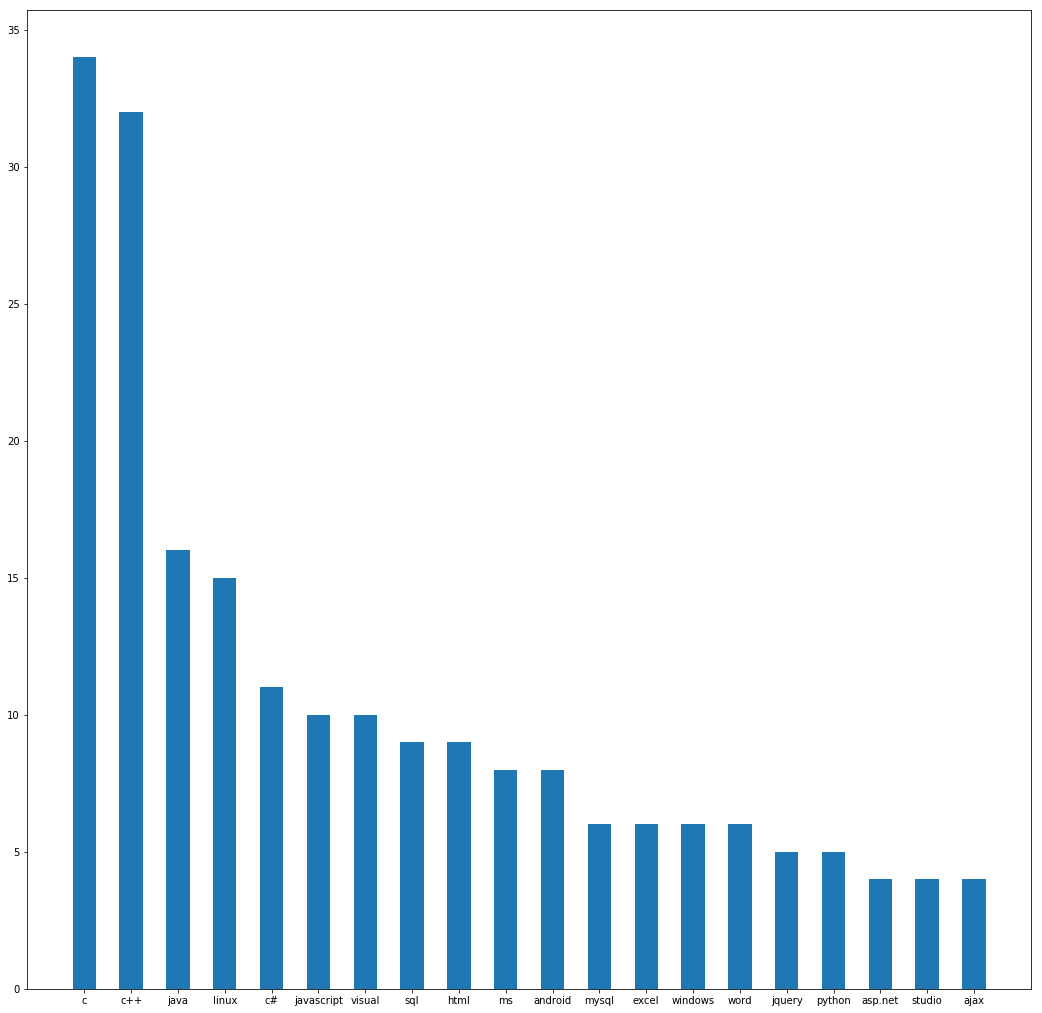

In [46]:
labels, values = zip(*D) #equals to labels = [x for x in D[0]] values =  [x for x in D[1]]

indexes = np.arange(len(labels))
width = 0.5

plt.figure(figsize=(18, 18))
plt.bar(indexes,[y//100 for y in values], width)
plt.xticks(indexes , labels)


plt.show()

## 下一步?  
1. 再細分職業分類
2. 時間分類
3. 綜合以上兩種